In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import boston_housing

**Linear Regression**
\begin{equation}
y = mx + b
\end{equation}

**Mean Squared Error**
\begin{equation}
MSE = \frac{1}{N}\sum_{i=0}^{N}({\hat{y} - y_{i}})^2
\end{equation}

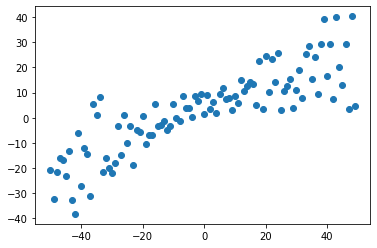

In [2]:
# Create data points
np.random.seed(0)
n = 100
x = np.arange(-n/2,n/2,1, dtype=np.float64)

# Randomly distributed parameters
m_true = np.random.uniform(0, 1, (n,))
b_true = np.random.uniform(0, 10, (n,))

y = m_true*x + b_true 

# Data points
plt.scatter(x,y)
plt.show()

# Save the train and the true points
x_train = np.array(x, dtype=np.float32)
y_true = np.array(y, dtype=np.float32)

In [3]:
# Define unknown parameters (Linear Regression)
m = tf.Variable(0., dtype=np.float32, name='slope')
b = tf.Variable(0., dtype=np.float32, name='intercept')
params = [m, b]

# Define the linear regression formula
@tf.function
def model_fun(x_train, params):
    return tf.math.add(tf.math.multiply(params[0], x_train), params[1])
    
# Define the loss function (mean squared error)

def mse(y_true, y_hat):
    return tf.reduce_mean(tf.square(y_true-y_hat))

# Update the parameters

def update_params(x_train, y_true, params, learning_rate):
    
    # To use multiple calls for grad.gradient()
    with tf.GradientTape(persistent=True) as grad:
        loss = mse(y_true, model_fun(x_train, params))
    
    print("Loss: ", loss)
    
    # Gradients of the linear regression
    dy_dm = grad.gradient(loss, params[0])
    dy_db = grad.gradient(loss, params[1])
    
    params[0].assign_sub(learning_rate * dy_dm)
    params[1].assign_sub(learning_rate * dy_db)

# Train the model

def train(x_train, y_true, params, learning_rate=0.01, epoch=10):
    
    params[0].assign(1, )
    params[1].assign(1, )
    
    for i in range(epoch):
        print("Train Epoch: ", i)
        update_params(x_train, y_true, params, learning_rate)

In [4]:
train(x_train, y_true, params, learning_rate=0.001, epoch=100)

Train Epoch:  0
Loss:  tf.Tensor(310.20728, shape=(), dtype=float32)
Train Epoch:  1
Loss:  tf.Tensor(182.19624, shape=(), dtype=float32)
Train Epoch:  2
Loss:  tf.Tensor(125.23498, shape=(), dtype=float32)
Train Epoch:  3
Loss:  tf.Tensor(99.883125, shape=(), dtype=float32)
Train Epoch:  4
Loss:  tf.Tensor(88.594, shape=(), dtype=float32)
Train Epoch:  5
Loss:  tf.Tensor(83.56129, shape=(), dtype=float32)
Train Epoch:  6
Loss:  tf.Tensor(81.31201, shape=(), dtype=float32)
Train Epoch:  7
Loss:  tf.Tensor(80.30112, shape=(), dtype=float32)
Train Epoch:  8
Loss:  tf.Tensor(79.841194, shape=(), dtype=float32)
Train Epoch:  9
Loss:  tf.Tensor(79.62645, shape=(), dtype=float32)
Train Epoch:  10
Loss:  tf.Tensor(79.52081, shape=(), dtype=float32)
Train Epoch:  11
Loss:  tf.Tensor(79.46375, shape=(), dtype=float32)
Train Epoch:  12
Loss:  tf.Tensor(79.42835, shape=(), dtype=float32)
Train Epoch:  13
Loss:  tf.Tensor(79.40262, shape=(), dtype=float32)
Train Epoch:  14
Loss:  tf.Tensor(79.3812

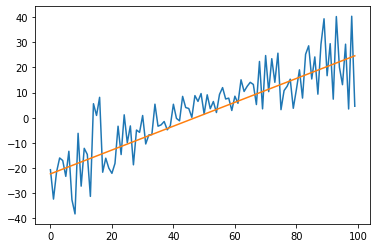

In [5]:
# Check the regression and the data
plt.plot(y)
plt.plot(params[0]*x_train+params[1])

In [6]:
params

[<tf.Variable 'slope:0' shape=() dtype=float32, numpy=0.47428155>,
 <tf.Variable 'intercept:0' shape=() dtype=float32, numpy=1.3951185>]